Imports

In [31]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import math


plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
df = pd.read_csv('../datasets/group_14.csv')

def plot_scatter_vs_target(df, features, target, n_cols=3, figsize_per_plot=(6, 5), title_prefix=""):
    for i in range(0, len(features), n_cols):
        subset = features[i:i+n_cols]
        fig, axes = plt.subplots(1, len(subset), figsize=(figsize_per_plot[0]*len(subset), figsize_per_plot[1]))

        if len(subset) == 1:
            axes = [axes]  # Make iterable

        fig.suptitle(f'{title_prefix} Scatter Plots vs {target}', fontsize=16)

        for ax, feature in zip(axes, subset):
            sns.scatterplot(x=feature, y=target, data=df, ax=ax)
            ax.set_title(f'{feature} vs {target}')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()



Descriptive Statistics

In [33]:
df.describe()

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_regression
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,0.09600,0.229333,0.350333,0.309333,0.015000,2.008333,1.540333,1.037000,-0.025506,-0.047147,...,0.130352,0.025000,0.0,0.038527,0.000247,0.504692,1.0,0.004712,0.665498,0.107533
std,0.29464,0.420474,0.477154,0.462296,0.121573,1.410057,1.139652,0.366528,0.975979,0.986551,...,0.919905,0.156151,0.0,1.055846,0.971671,0.288604,0.0,0.995719,0.275471,1.299532
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.024149,-1.511882,...,-3.127164,0.000000,0.0,-4.074538,-3.817043,0.000368,1.0,-3.266071,0.007560,-1.490205
25%,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.221824,-0.949100,...,-0.498105,0.000000,0.0,-0.804897,-0.650350,0.256767,1.0,-0.616857,0.446750,-1.490205
50%,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.221824,-0.076786,...,0.257656,0.000000,0.0,0.021025,0.008903,0.505187,1.0,0.090464,0.746500,0.392792
75%,0.00000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.221824,0.767388,...,0.821251,0.000000,0.0,0.728654,0.661613,0.757180,1.0,0.732960,0.910000,1.289458
max,1.00000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.533318,1.611562,...,6.764028,1.000000,0.0,2.805340,3.380614,0.999913,1.0,2.300303,0.998000,2.320623


In [34]:
df.select_dtypes(include="object")

,focus_factor,target_class
0,0.263,class_45
1,0.0,class_45
2,0.0,class_45
3,1.15e-06,class_45
4,0.0,class_45
...,...,...
2995,0.111,class_73
2996,0.785,class_73
2997,7.39e-06,class_73
2998,0.00211,class_73


Transform focus_factor into float


In [35]:
df["focus_factor"] = (
    df["focus_factor"]
    .astype(str)                  # ensure it's string
    .str.replace(",", ".", regex=False)  # replace comma with dot
)
df["focus_factor"] = pd.to_numeric(df["focus_factor"], errors="coerce").astype(float)


Check for Missing Values and Unique Values

This shows that there is no missing values found in the dataset

In [36]:

data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
data_info
#data_info

,Data Type,Missing Values,Unique Values
duration_1,float64,0,2
duration_2,float64,0,2
duration_3,float64,0,2
duration_4,float64,0,2
duration_5,float64,0,2
loudness_level,float64,0,5
popularity_level,float64,0,5
tempo_class,float64,0,3
time_signature,float64,0,5
key_mode,float64,0,24


In [37]:
duplicated = df.duplicated()
print(df[duplicated])          # shows duplicate rows
print(df[duplicated].shape)    # how many duplicate rows
#No duplicate found

Empty DataFrame
Columns: [duration_1, duration_2, duration_3, duration_4, duration_5, loudness_level, popularity_level, tempo_class, time_signature, key_mode, artist_song_count, album_freq, movement_index, intensity_level, verbal_density, purity_score, positivity_index, activity_rate, loudness_intensity, happy_dance, acoustics_instrumental, artists_avg_popularity, tempo_vs_genre, energy_rank_pct, loud_energy_ratio, mood_pca, mood_cluster, acoustic_valence_mood_cluster, explicit, signal_strength, mode_indicator, focus_factor, ambient_level, key_sin, key_cos, duration_log, duration_log_z, time_signature_class_boolean, loudness_yeo, is_instrumental, is_dance_hit, temp_zscore, resonance_factor, timbre_index, echo_constant, distorted_movement, signal_power, target_class, target_regression]
Index: []

[0 rows x 49 columns]
(0, 49)


Here we keep all the categorical attribute and analysis only the numerical attributes and eliminates ones that has correlation to Y > 0.2

We left out the categorical attribute for now , for later analysis

**Univariate analysis**

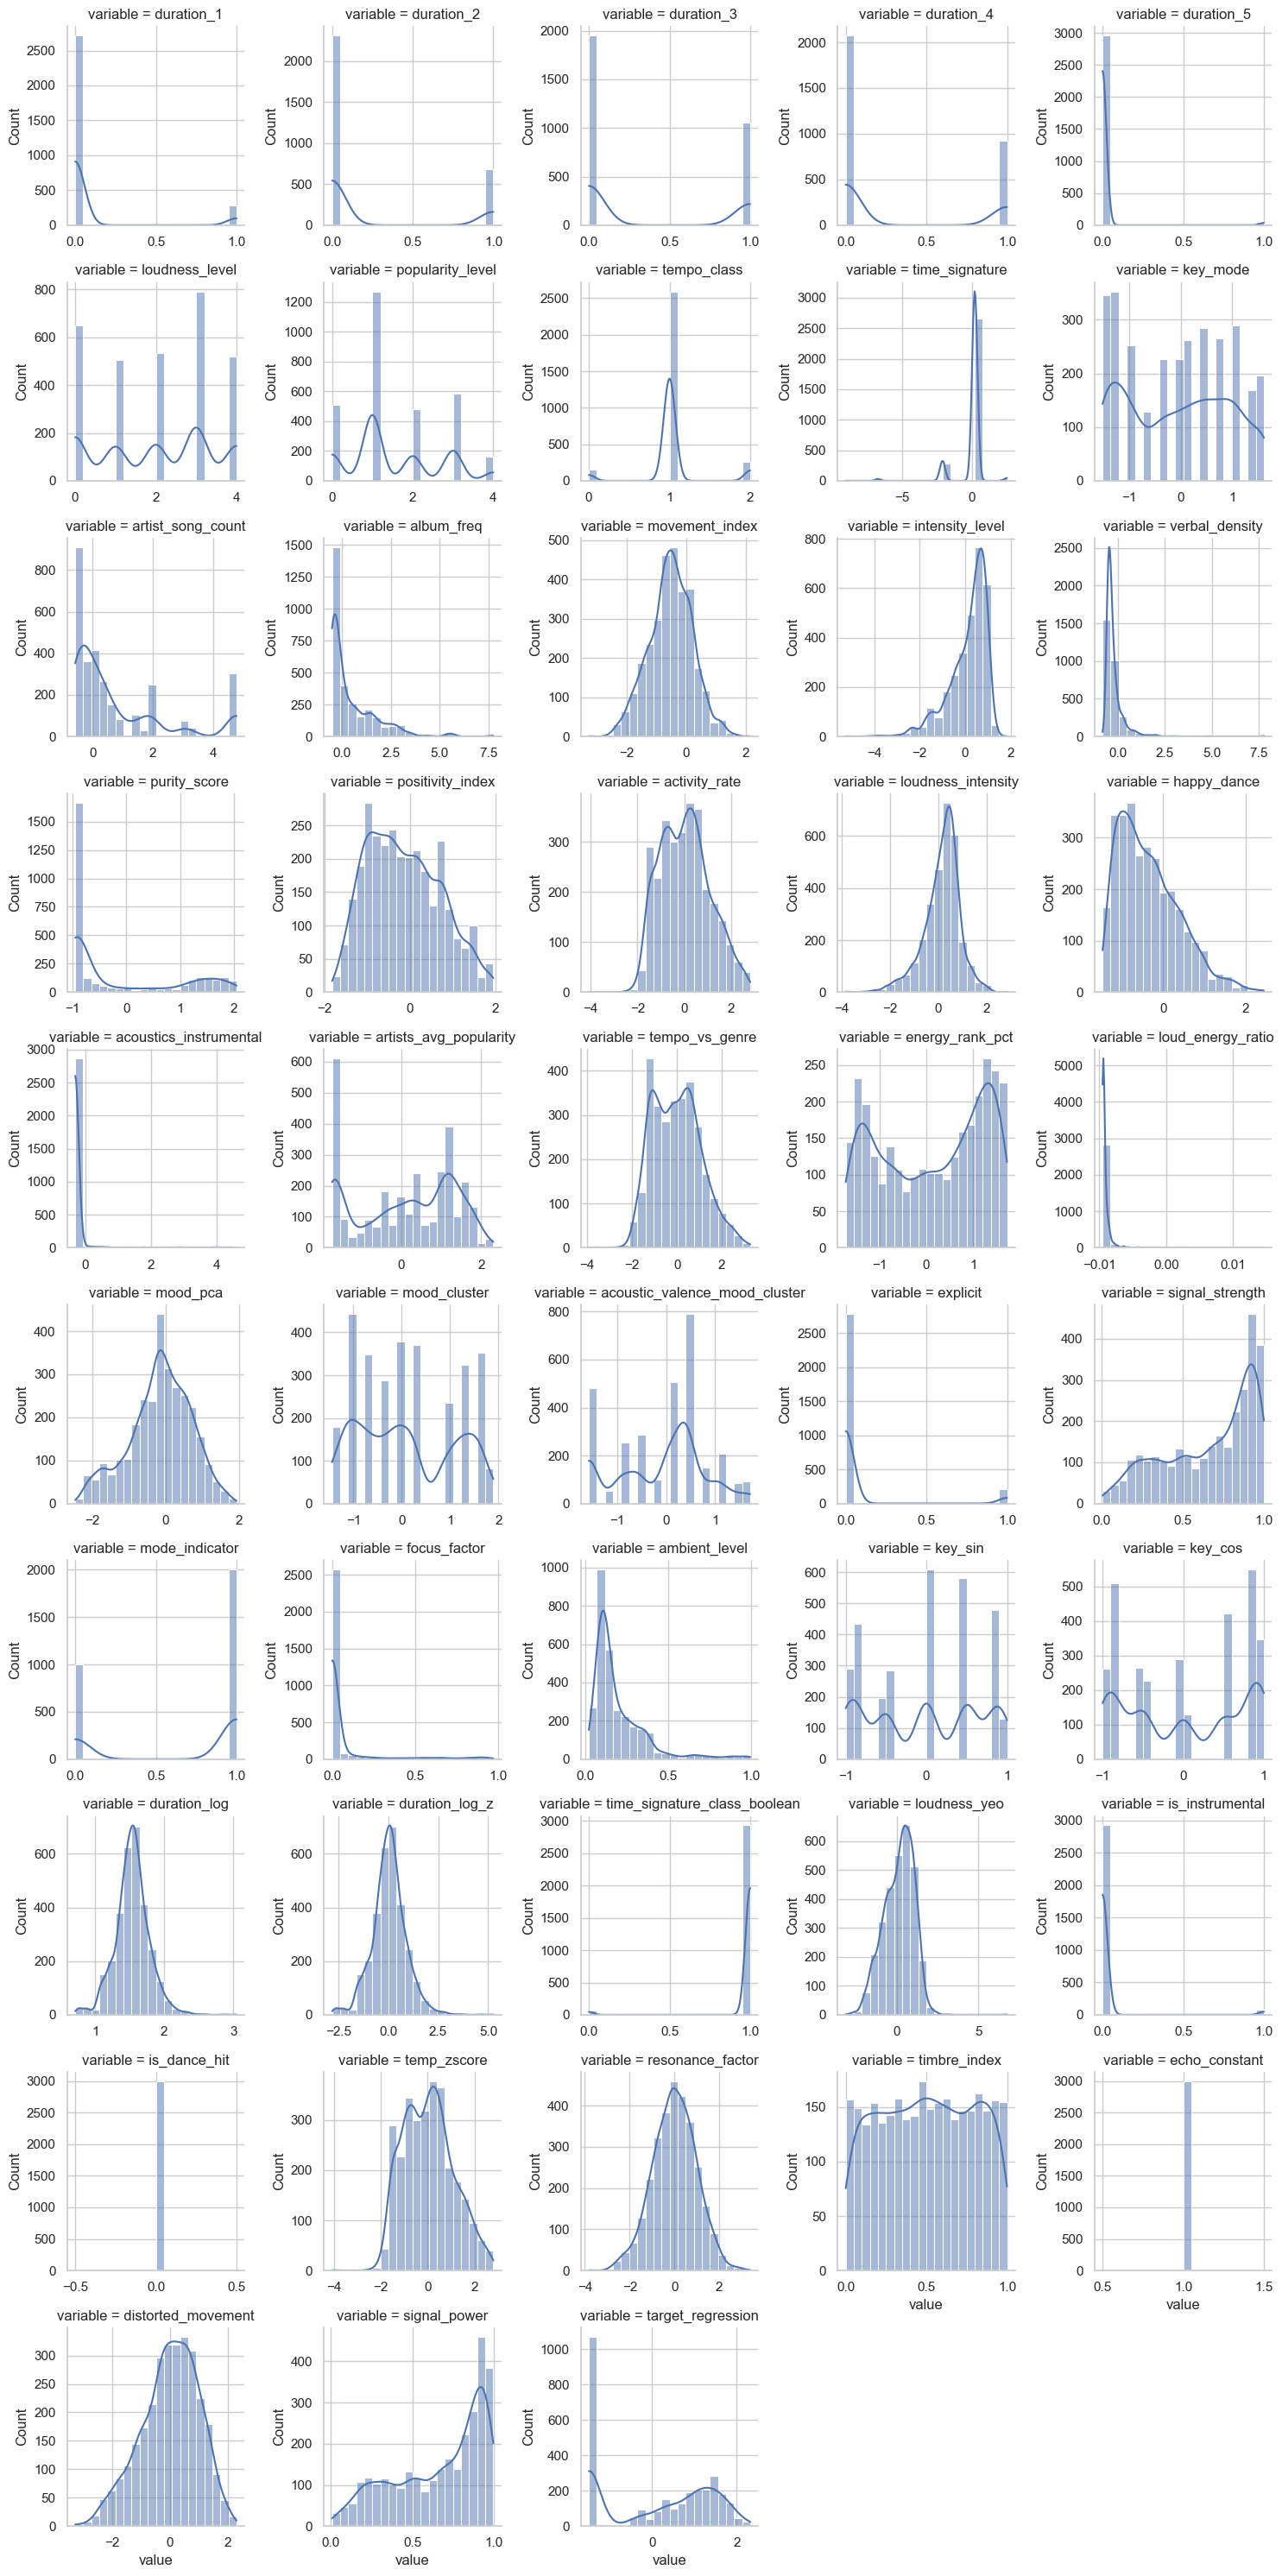

In [38]:
sns.set_theme(style='whitegrid')
num_cols = df.select_dtypes(include='number').columns
n = len(num_cols)

df_melt = df.melt(value_vars=num_cols)
g = sns.FacetGrid(df_melt, col="variable", col_wrap=5, sharex=False, sharey=False, height=3)
g.map(sns.histplot, "value", kde=True, bins=20)
plt.show()


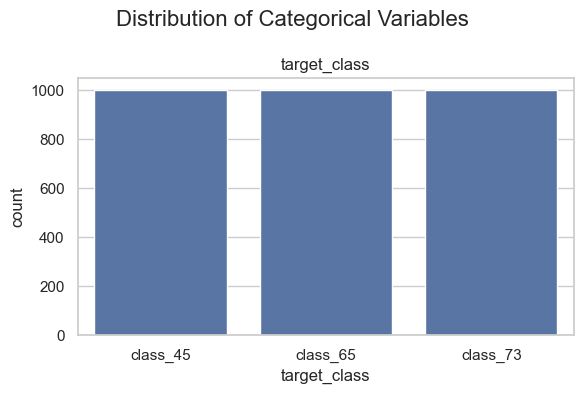

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

sns.countplot(x='target_class', data=df, ax=ax)
ax.set_title('target_class')

plt.tight_layout()
plt.show()



**Bivariate Analysis**

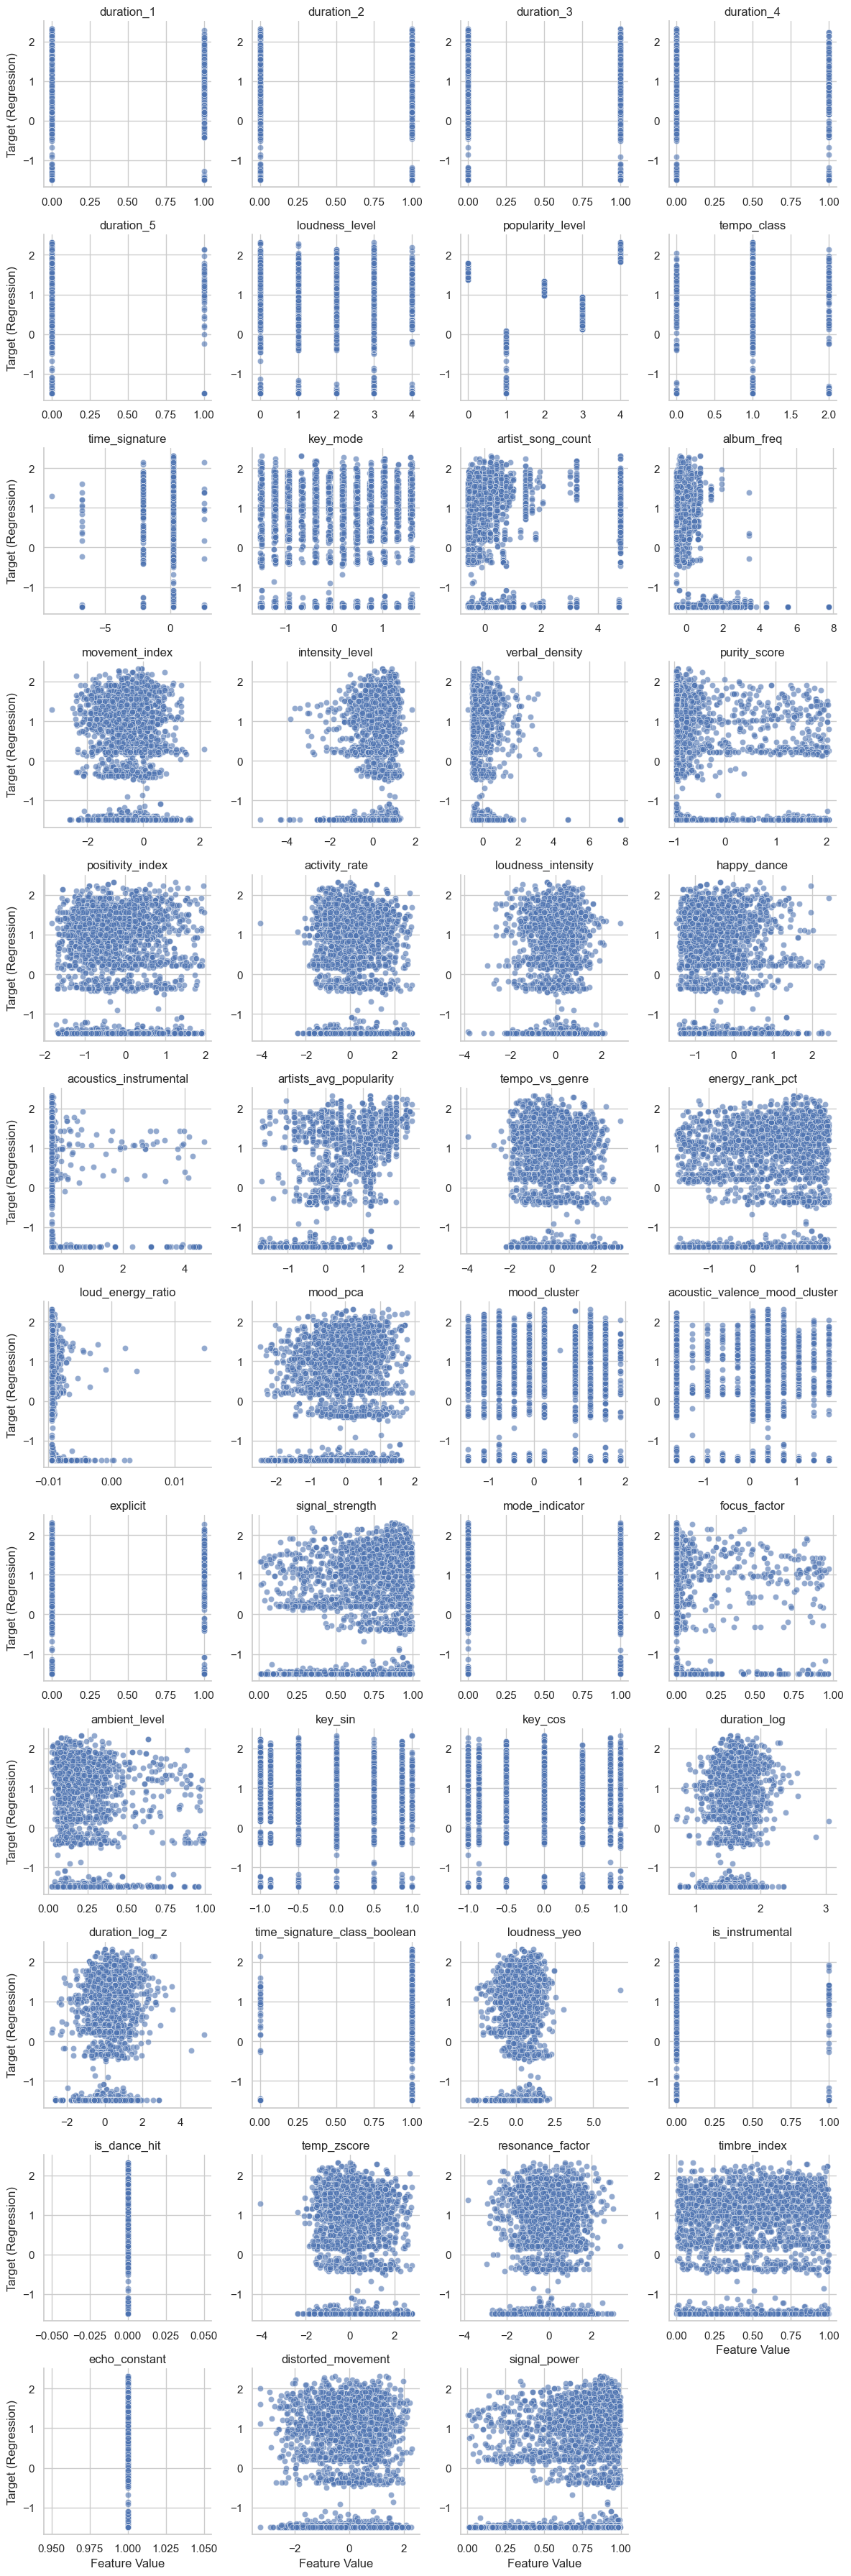

In [40]:
num_cols = df.select_dtypes(include='number').columns.drop('target_regression')

# Reshape the dataframe for FacetGrid plotting
df_melt = df.melt(id_vars='target_regression', value_vars=num_cols,
                  var_name='Feature', value_name='Value')

# Create scatterplots of each feature vs target
g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, sharex=False, sharey=False, height=3)
g.map_dataframe(sns.scatterplot, x="Value", y="target_regression", alpha=0.6)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Feature Value", "Target (Regression)")
plt.tight_layout()
plt.show()

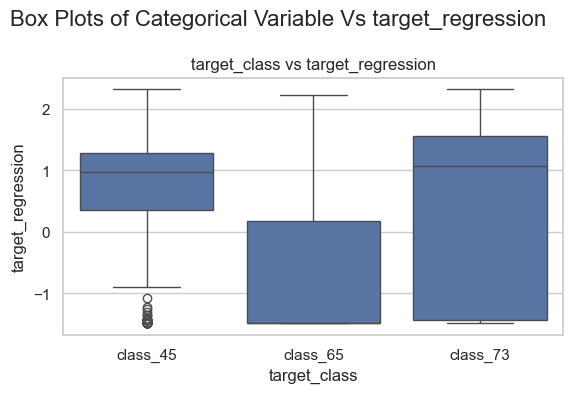

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Box Plots of Categorical Variable Vs target_regression ', fontsize=16)

sns.boxplot(x='target_class',y='target_regression', data=df, ax=ax)
ax.set_title('target_class vs target_regression')

plt.tight_layout()
plt.show()

In [48]:
df_numerical = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numerical.corr().abs()  # absolute values to catch both positive and negative correlations

# Unstack and filter upper triangle only
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# List pairs above a threshold
threshold = 0.8
high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    .query(f'Correlation > {threshold}')
    .sort_values(by='Correlation', ascending=False)
)

print("Highly correlated feature pairs (|r| > 0.8):")
print(high_corr_pairs)

Highly correlated feature pairs (|r| > 0.8):
                   Feature 1          Feature 2  Correlation
913          signal_strength       signal_power     1.000000
651            activity_rate        temp_zscore     1.000000
980             duration_log     duration_log_z     1.000000
787          energy_rank_pct    signal_strength     0.983519
802          energy_rank_pct       signal_power     0.983519
633            activity_rate     tempo_vs_genre     0.971030
776           tempo_vs_genre        temp_zscore     0.971030
531          intensity_level       loudness_yeo     0.962941
602         positivity_index        happy_dance     0.928262
598             purity_score       signal_power     0.881180
583             purity_score    signal_strength     0.881180
1012            loudness_yeo       signal_power     0.851699
907          signal_strength       loudness_yeo     0.851699
522          intensity_level    signal_strength     0.850510
537          intensity_level       signa

Some features in the dataset are highly correlated (|r| > 0.8), meaning they carry almost identical information. Including multiple highly correlated features in a regression model can cause multicollinearity, making coefficients unstable and reducing interpretability.

To address this, we retain only one representative from each highly correlated group — typically the most interpretable or relevant feature — and exclude the redundant ones.

**Excluded features (highly correlated/redundant):**
`signal_power, temp_zscore, duration_log_z, energy_rank_pct, tempo_vs_genre, intensity_level, happy_dance`


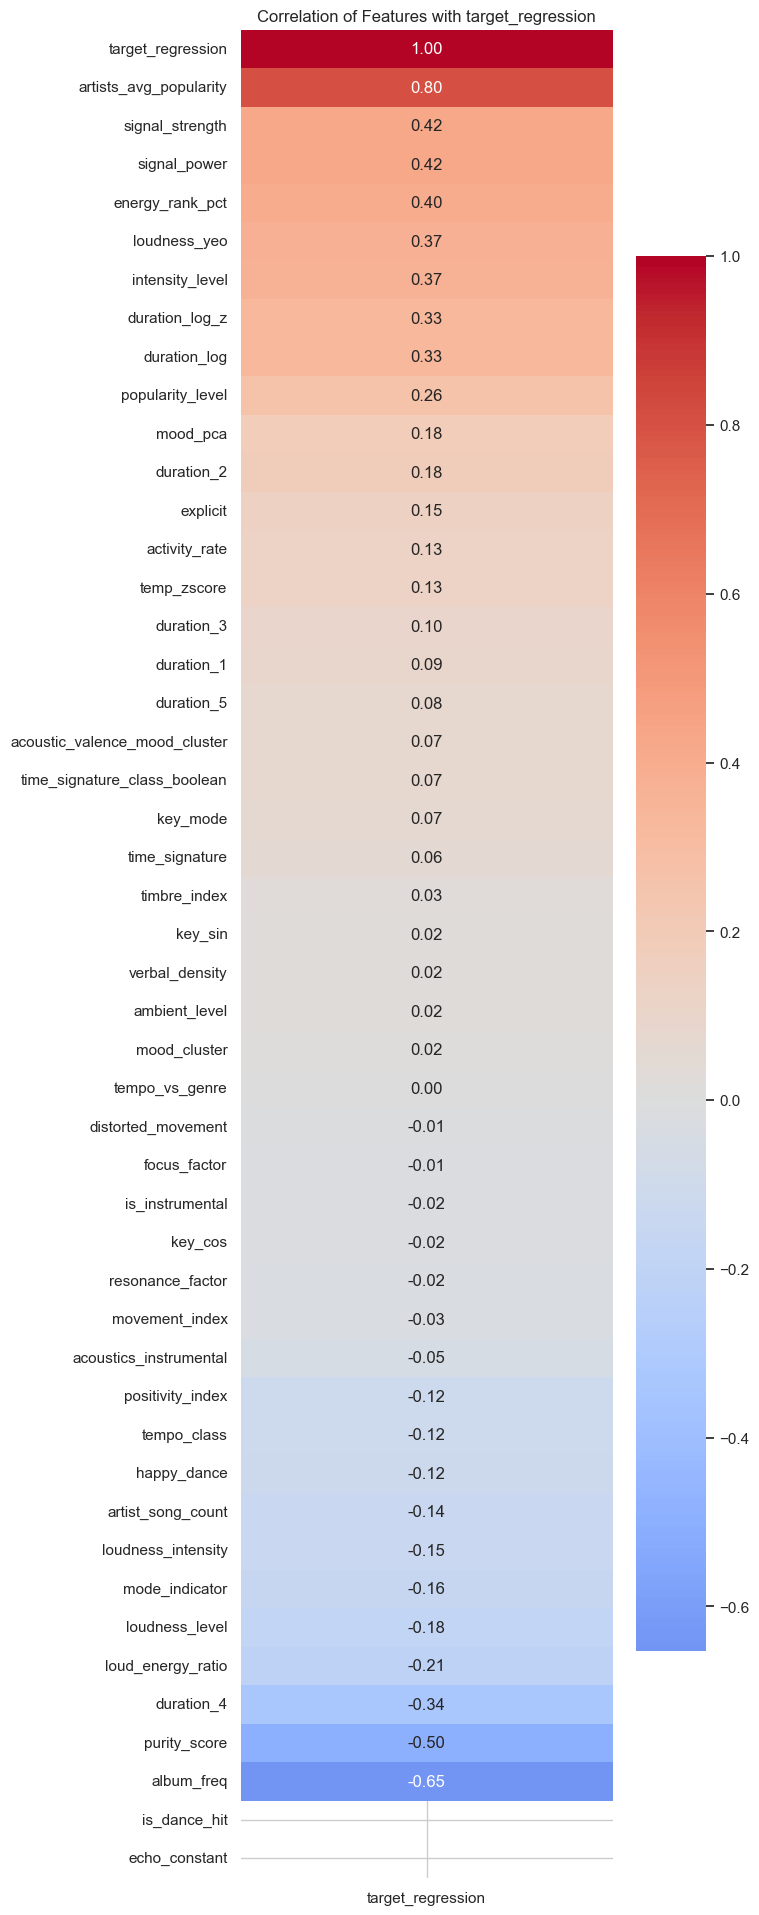

In [49]:
# Compute correlation of all columns with target
target_corr = df_numerical.corr()[['target_regression']].sort_values(by='target_regression', ascending=False)

# Plot as a heatmap
plt.figure(figsize=(6, len(target_corr) * 0.5))  # adjust height for many features
sns.heatmap(target_corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation of Features with target_regression")
plt.show()

The features "is_dance_hit" and "echo_constant" show no measurable correlation (NaN or near zero)
 with the target variable "target_regression".

 This suggests they provide little to no linear predictive value for the regression model.

In [ ]:
features_to_exclude= [
    "signal_power",
    "temp_zscore",
    "duration_log_z",
    "energy_rank_pct",
    "tempo_vs_genre",
    "intensity_level",
    "happy_dance"
    "is_dance_hit"
    "echo_constant"
]